# Derivation of a van't Hoff equation based model for fitting signal vs. temperature data exhibiting sloping baselines
## David M. Morgan, Ph.D.
For the Colbert Laboratory at NDSU, with my thanks and best wishes.

<font size="5">Thermodynamics of Protein Denaturation</font><br><br>
<font size="5">The van't Hoff Equation</font><br><br>
Consider the equilibrium between the native (N) and random coil (C) states of a protein:
$$N\rightleftharpoons C$$
and recall that the equilibrium constant for this process is:
$$K=\frac{C}{N}$$
in which:<br>
&emsp;C&emsp;&emsp;is the concentration of the random coil species, and<br>
&emsp;N&emsp;&emsp;is the concentration of the native species.<br><br>
At low temperatures, the equilibrium constant will have values much smaller than 1, indicating that the native state of the protein massively predominates over the random coil state at those temperatures. In contrast, at high temperatures, the equilibrium constant will have values much larger than 1, indicating that the random coil state massively predominates over the native state. At intermediate temperatures, the equilibrium constant will have intermediate values, and at a particular temperature, the melting temperature $T_M$, the populations of native and random coil states will be precisely equal and the equilibrium constant will have a value of 1.<br><br>
The temperature dependence of the equilibrium constant is given by the linear form of the [van't Hoff equation](https://en.wikipedia.org/wiki/Van_%27t_Hoff_equation):
$$ln(K)=-\frac{\Delta H\degree}{R}\frac{1}{T}+\frac{\Delta S\degree}{R}$$

If the value of the equilibrium constant is known at any one temperature, its value at another temperature, e.g. $T_M$, may be estimated using the integrated form of the equation:
$$ln(\frac{K}{K_{T_M}})=-\frac{\Delta H\degree}{R}(\frac{1}{T}-\frac{1}{T_M})$$
Because, in this case $K_{T_M}=1$, this simplifies even further:
$$ln(K)=-\frac{\Delta H\degree}{R}(\frac{1}{T}-\frac{1}{T_M})$$
<br>
To make use of this relationship to estimate the melting temperature and enthalpy of thermal denaturation for an arbitrary protein, it is necessary to establish a relationship between the equilibrium constant at an arbitrary temperature and an observable signal that varies as a function of temperature. Usually this signal is spectroscopic.<br><br>
<font size="5">Total and Fractional Protein Concentrations & Reformulation of the Equilibrium Constant</font><br><br>

In a two-state protein denaturation equilibrium consisting of an N state and a C state, let:<br><br>
&emsp;T&emsp;&emsp;be the total protein concentration, the sum of that in each of states N and C<br>
&emsp;$f_N$&emsp;&emsp;be the fraction of total protein found in state N, and<br>
&emsp;$f_C$&emsp;&emsp;be the fraction of total protein found in state C.<br><br>
Algebraically:<br>
$$T=N+C$$
$$f_N=\frac{N}{T}=\frac{N}{N+C}$$
$$f_C=\frac{C}{T}=\frac{C}{N+C}$$
$$f_N+f_C=\frac{N}{N+C}+\frac{C}{N+C}=\frac{N+C}{N+C}=1$$
<br>
If:
$$K=\frac{C}{N}$$
then, substituting $f_C*T$ and $f_N*T$ for $C$ and $N$ respectively, provides:
$$K=\frac{f_C*T}{f_N*T}$$
and $T$ drops out to afford:
$$K=\frac{f_C}{f_N}$$
Substituting $1-f_N$ for $f_C$ again eliminates an unnecessary parameter:
$$K=\frac{1-f_N}{f_N}$$
<br><br>
<font size="5">Fractional Protein Concentrations &<br>the Observed Signal</font><br><br>
Because the signal that is observed at any moment must derive from either the native conformation of the protein or its random coil conformation, it must be a linear combination of each of these signals weighted by the fraction of total protein molecules found in each of those states.<br><br>
Algebraically:
$$\sigma=f_N\sigma_N+f_C\sigma_C$$
Again $f_C$ is eliminated in the usual way to afford:
$$\sigma=f_N\sigma_N+(1-f_N)\sigma_C$$
from which an expression isolating $f_N$ may be prepared:
$$f_N=\frac{\sigma-\sigma_C}{\sigma_N-\sigma_C}$$
Substitution of this result into that from the section above for the equilibrium constant provides:
$$K=\frac{1-\frac{\sigma-\sigma_C}{\sigma_N-\sigma_C}}{\frac{\sigma-\sigma_C}{\sigma_N-\sigma_C}}$$
This rearranges to the tractable:
$$K=\frac{\sigma_N-\sigma}{\sigma-\sigma_C}$$
which may be substituted into the integrated form of the van't Hoff equation:
$$ln(K)=-\frac{\Delta H\degree}{R}(\frac{1}{T}-\frac{1}{T_M})$$
to provide:
$$ln(\frac{\sigma_N-\sigma}{\sigma-\sigma_C})=-\frac{\Delta H\degree}{R}(\frac{1}{T}-\frac{1}{T_M})$$
Exponentiation provides:
$$\frac{\sigma_N-\sigma}{\sigma-\sigma_C}=e^{-\frac{\Delta H\degree}{R}(\frac{1}{T}-\frac{1}{T_M})}$$
from which an expression for the observed signal in terms of temperature and fittable parameters $\Delta H\degree$ and $T_M$ may be prepared:
$$\sigma=\frac{\sigma_N+\sigma_Ce^{-\frac{\Delta H\degree}{R}(\frac{1}{T}-\frac{1}{T_M})}}{1+e^{-\frac{\Delta H\degree}{R}(\frac{1}{T}-\frac{1}{T_M})}}$$<br><br>
Is this correct?

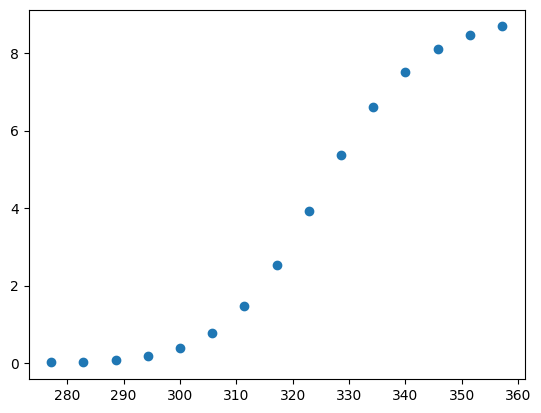

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sigmafunc(T, sigmaN, sigmaC, deltaH, TM, R=8.3144):
    Q=np.exp(-deltaH/R*(1/T-1/TM))
    return ((sigmaN+sigmaC*Q)/(1+Q))

mintemp = 4 # degrees C
maxtemp = 84 
mintemp += 273.15 # conversion to Kelvin
maxtemp += 273.15
T = np.linspace(mintemp, maxtemp, 15)

sigmaN = 0 # arbitrary
sigmaC = 9 # arbitrary, but != sigmaN
deltaH = 100000 # Joules per mol, because if undeclared, R=8.3144 Joules per (Kelvin mol)
TM = 52 # degrees C
TM += 273.15 # conversion to Kelvin

sigma = sigmafunc(T, sigmaN, sigmaC, deltaH, TM)
plt.scatter(T,sigma)
plt.show()

Yes, the result above is reasonable.